<a href="https://colab.research.google.com/github/leonardo-91/sistemas-inteligentes/blob/main/Prean%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import matplotlib as mpl

In [ ]:
mpl.style.use("ggplot")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_bank = pd.read_csv("/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv", sep=";")

In [ ]:
df_bank.drop(inplace=True,axis=1,columns=["job","default","housing","contact","day","month","duration","campaign","pdays","poutcome"])

In [ ]:
df_bank=df_bank[~df_bank.education.isin(['unknown'])]

In [ ]:
df_bank  =df_bank[~df_bank.previous.isin([275])]

In [ ]:
df_bank = df_bank.reset_index(drop=True)
df_bank.shape

(43353, 7)

In [ ]:
df_bank.head()

,age,marital,education,balance,loan,previous,y
0,58,married,tertiary,2143,no,0,no
1,44,single,secondary,29,no,0,no
2,33,married,secondary,2,yes,0,no
3,35,married,tertiary,231,no,0,no
4,28,single,tertiary,447,yes,0,no


In [ ]:
def change_age(x):
  if x <= 50:
    return "Joven"
  elif x <= 70:
    return "Adulto"
  else:
    return "Adulto Mayor"

def change_marital(x):
  if x == "married":
    return "Casado"
  if x == "single":
    return "Soltero"
  if x == "divorced":
    return "Divorciado"

def change_education(x):
  if x == "primary":
    return "Primaria"
  if x == "secondary":
    return "Segundaria"
  if x == "tertiary":
    return "Universitario"

def change_balance(x):
  if x <= 15000:
    return "Bajo"
  elif x <= 60000:
    return "Medio"
  else:
    return "Alto"

def change_loan(x):
  if x == "yes":
    return "Si"
  if x == "no":
    return "No"

def change_previous(x):
  if x <= 1:
    return "Bajo"
  elif x <= 10:
    return "Medio"
  else:
    return "Alto"

In [ ]:
df = df_bank.copy()
df.head()

,age,marital,education,balance,loan,previous,y
0,58,married,tertiary,2143,no,0,no
1,44,single,secondary,29,no,0,no
2,33,married,secondary,2,yes,0,no
3,35,married,tertiary,231,no,0,no
4,28,single,tertiary,447,yes,0,no


In [ ]:
df["age"] = df.apply(lambda row: change_age(row["age"]), axis=1)
df["marital"] = df.apply(lambda row: change_marital(row["marital"]), axis=1)
df["education"] = df.apply(lambda row: change_education(row["education"]), axis=1)
df["balance"] = df.apply(lambda row: change_balance(row["balance"]), axis=1)
df["loan"] = df.apply(lambda row: change_loan(row["loan"]), axis=1)
df["previous"] = df.apply(lambda row: change_previous(row["previous"]), axis=1)
df.drop("y", axis = 1, inplace = True)
df

,age,marital,education,balance,loan,previous
0,Adulto,Casado,Universitario,Bajo,No,Bajo
1,Joven,Soltero,Segundaria,Bajo,No,Bajo
2,Joven,Casado,Segundaria,Bajo,Si,Bajo
3,Joven,Casado,Universitario,Bajo,No,Bajo
4,Joven,Soltero,Universitario,Bajo,Si,Bajo
...,...,...,...,...,...,...
43348,Adulto,Casado,Universitario,Bajo,No,Bajo
43349,Adulto Mayor,Divorciado,Primaria,Bajo,No,Bajo
43350,Adulto Mayor,Casado,Segundaria,Bajo,No,Medio
43351,Adulto,Casado,Segundaria,Bajo,No,Bajo


In [ ]:
freq = {}
for i in range(len(df)):
  k = tuple(df.loc[[i]].to_numpy()[0])
  if k in freq:
    freq[k] += 1
  else:
    freq[k] = 1

In [ ]:
for k in sorted(freq, key=freq.get, reverse=True):
  print(k, freq[k])

('Joven', 'Casado', 'Segundaria', 'Bajo', 'No', 'Bajo') 7484
('Joven', 'Soltero', 'Segundaria', 'Bajo', 'No', 'Bajo') 4656
('Joven', 'Casado', 'Universitario', 'Bajo', 'No', 'Bajo') 3976
('Joven', 'Soltero', 'Universitario', 'Bajo', 'No', 'Bajo') 3498
('Joven', 'Casado', 'Primaria', 'Bajo', 'No', 'Bajo') 2572
('Adulto', 'Casado', 'Segundaria', 'Bajo', 'No', 'Bajo') 2082
('Joven', 'Casado', 'Segundaria', 'Bajo', 'Si', 'Bajo') 1932
('Joven', 'Divorciado', 'Segundaria', 'Bajo', 'No', 'Bajo') 1452
('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Bajo') 1299
('Adulto', 'Casado', 'Universitario', 'Bajo', 'No', 'Bajo') 1086
('Joven', 'Casado', 'Segundaria', 'Bajo', 'No', 'Medio') 957
('Joven', 'Soltero', 'Segundaria', 'Bajo', 'Si', 'Bajo') 875
('Joven', 'Divorciado', 'Universitario', 'Bajo', 'No', 'Bajo') 704
('Joven', 'Casado', 'Universitario', 'Bajo', 'Si', 'Bajo') 702
('Joven', 'Soltero', 'Segundaria', 'Bajo', 'No', 'Medio') 664
('Joven', 'Soltero', 'Primaria', 'Bajo', 'No', 'Bajo') 596
('J

In [ ]:
for k in list(freq.keys()):
  if freq[k] > 700:
    freq[k] = "Muy Alto"
  elif freq[k] > 200:
    freq[k] = "Alto"
  else:
    freq[k] = "Bajo"
freq

{('Adulto', 'Casado', 'Primaria', 'Alto', 'No', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Bajo'): 'Muy Alto',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Bajo'): 'Alto',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Segundaria', 'Bajo', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Segundaria', 'Bajo', 'No', 'Bajo'): 'Muy Alto',
 ('Adulto', 'Casado', 'Segundaria', 'Bajo', 'No', 'Medio'): 'Alto',
 ('Adulto', 'Casado', 'Segundaria', 'Bajo', 'Si', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Segundaria', 'Bajo', 'Si', 'Bajo'): 'Alto',
 ('Adulto', 'Casado', 'Segundaria', 'Bajo', 'Si', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Segundaria', 'Medio', 'No', 'Bajo'): 'Ba

In [ ]:
import itertools
a = [["Joven", "Adulto", "Adulto Mayor"],  ["Soltero", "Casado", "Divorciado"], ["Primaria", "Segundaria", "Universitario"] , ["Bajo", "Medio", "Alto"], ["Si", "No"], ["Bajo", "Medio", "Alto"]]
comb = {}
for k in list(itertools.product(*a)):
  comb[k] = "Bajo"
comb

{('Adulto', 'Casado', 'Primaria', 'Alto', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'No', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'No', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'Si', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'Si', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'Si', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Medio'): 'Bajo',
 ('Adulto', 'Casa

In [ ]:
for k in list(freq.keys()):
    comb[k] = freq[k]
comb

{('Adulto', 'Casado', 'Primaria', 'Alto', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'No', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'No', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'Si', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'Si', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Alto', 'Si', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Bajo'): 'Muy Alto',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'No', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Bajo'): 'Alto',
 ('Adulto', 'Casado', 'Primaria', 'Bajo', 'Si', 'Medio'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Alto'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Bajo'): 'Bajo',
 ('Adulto', 'Casado', 'Primaria', 'Medio', 'No', 'Medio'): 'Bajo',
 ('Adulto', '

In [ ]:
#rule1 = ctrl.Rule(balance['Bajo'] & marital['Soltero'] & loan['No'] & education['Primaria'] & age['Joven'] & previous['Bajo'], y['Bajo'])
for i, k in enumerate(list(comb.keys())):
  print(f"rule{i+1} = ctrl.Rule(age['{k[0]}'] & marital['{k[1]}'] & education['{k[2]}'] & balance['{k[3]}'] & loan['{k[4]}'] & previous['{k[5]}'], y['{comb[k]}'])")

rule1 = ctrl.Rule(age['Joven'] & marital['Soltero'] & education['Primaria'] & balance['Bajo'] & loan['Si'] & previous['Bajo'], y['Bajo'])
rule2 = ctrl.Rule(age['Joven'] & marital['Soltero'] & education['Primaria'] & balance['Bajo'] & loan['Si'] & previous['Medio'], y['Bajo'])
rule3 = ctrl.Rule(age['Joven'] & marital['Soltero'] & education['Primaria'] & balance['Bajo'] & loan['Si'] & previous['Alto'], y['Bajo'])
rule4 = ctrl.Rule(age['Joven'] & marital['Soltero'] & education['Primaria'] & balance['Bajo'] & loan['No'] & previous['Bajo'], y['Alto'])
rule5 = ctrl.Rule(age['Joven'] & marital['Soltero'] & education['Primaria'] & balance['Bajo'] & loan['No'] & previous['Medio'], y['Bajo'])
rule6 = ctrl.Rule(age['Joven'] & marital['Soltero'] & education['Primaria'] & balance['Bajo'] & loan['No'] & previous['Alto'], y['Bajo'])
rule7 = ctrl.Rule(age['Joven'] & marital['Soltero'] & education['Primaria'] & balance['Medio'] & loan['Si'] & previous['Bajo'], y['Bajo'])
rule8 = ctrl.Rule(age['Joven'] 

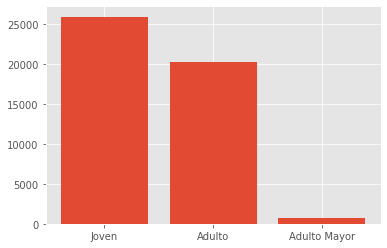

In [ ]:
x = np.array(["Joven", "Adulto", "Adulto Mayor"])

b1 = len(df_bank[(df_bank["age"] >= 32) & (df_bank["age"] <= 50)])
b2 = len(df_bank[(df_bank["age"] >= 40) & (df_bank["age"] <= 70)])
b3 = len(df_bank[(df_bank["age"] >= 65) & (df_bank["age"] <= 95)])

y = np.array([b1, b2, b3])


plt.bar(x,y)
plt.show()

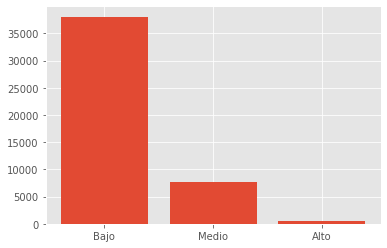

In [ ]:
x = np.array(["Bajo", "Medio", "Alto"])

label = "previous"
b1 = len(df_bank[(df_bank[label] >= 0) & (df_bank[label] <= 1)])
b2 = len(df_bank[(df_bank[label] >= 1) & (df_bank[label] <= 10)])
b3 = len(df_bank[(df_bank[label] >= 9) & (df_bank[label] <= 58)])

y = np.array([b1, b2, b3])


plt.bar(x,y)
plt.show()

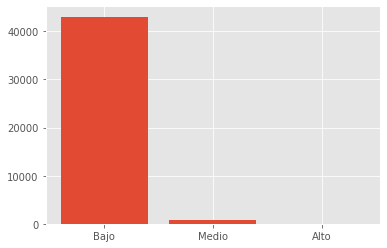

In [ ]:
x = np.array(["Bajo", "Medio", "Alto"])

label = "balance"
b1 = len(df_bank[df_bank[label] <= 15000])
b2 = len(df_bank[(df_bank[label] >= 10000) & (df_bank[label] <= 60000)])
b3 = len(df_bank[(df_bank[label] >= 50000) & (df_bank[label] <= 140000)])

y = np.array([b1, b2, b3])


plt.bar(x,y)
plt.show()

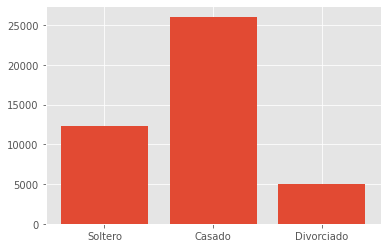

In [ ]:
x = np.array(["Soltero", "Casado", "Divorciado"])

label = "marital"
b1 = len(df_bank[df_bank[label] == "single"])
b2 = len(df_bank[df_bank[label] == "married"])
b3 = len(df_bank[df_bank[label] == "divorced"])

y = np.array([b1, b2, b3])


plt.bar(x,y)
plt.show()

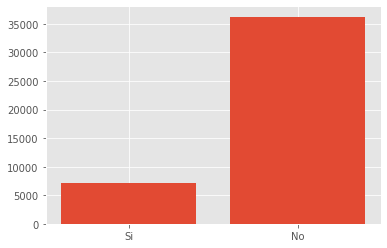

In [ ]:
x = np.array(["Si", "No"])

label = "loan"
b1 = len(df_bank[df_bank[label] == "yes"])
b2 = len(df_bank[df_bank[label] == "no"])

y = np.array([b1, b2])


plt.bar(x,y)
plt.show()

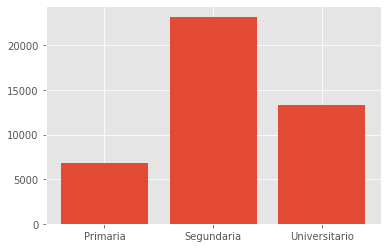

In [ ]:
x = np.array(["Primaria", "Segundaria", "Universitario"])

label = "education"
b1 = len(df_bank[df_bank[label] == "primary"])
b2 = len(df_bank[df_bank[label] == "secondary"])
b3 = len(df_bank[df_bank[label] == "tertiary"])

y = np.array([b1, b2, b3])


plt.bar(x,y)
plt.show()

In [ ]:
df_bank_yes = df_bank[df_bank["y"] == "yes"]
df_bank_yes.head()

,age,marital,education,balance,loan,previous,y
74,59,married,secondary,2343,no,0,yes
77,56,married,secondary,45,no,0,yes
78,41,married,secondary,1270,no,0,yes
117,55,married,secondary,2476,no,0,yes
151,54,married,tertiary,184,no,0,yes


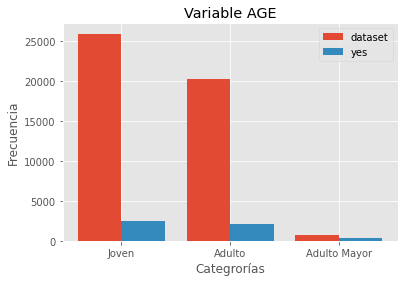

In [ ]:
x = np.array(["Joven", "Adulto", "Adulto Mayor"])

b1 = len(df_bank[(df_bank["age"] >= 32) & (df_bank["age"] <= 50)])
b2 = len(df_bank[(df_bank["age"] >= 40) & (df_bank["age"] <= 70)])
b3 = len(df_bank[(df_bank["age"] >= 65) & (df_bank["age"] <= 95)])

b4 = len(df_bank_yes[(df_bank_yes["age"] >= 32) & (df_bank_yes["age"] <= 50)])
b5 = len(df_bank_yes[(df_bank_yes["age"] >= 40) & (df_bank_yes["age"] <= 70)])
b6 = len(df_bank_yes[(df_bank_yes["age"] >= 65) & (df_bank_yes["age"] <= 95)])

y1 = np.array([b1, b2, b3])
y2 = np.array([b4, b5, b6])

X = np.arange(len(x))


plt.bar(X-0.2, y1, 0.4, label = 'dataset')
plt.bar(X+0.2, y2, 0.4, label = 'yes')

plt.legend()
plt.xticks(X, x)

plt.xlabel("Categrorías")
plt.ylabel("Frecuencia")
plt.title("Variable AGE")
plt.show()

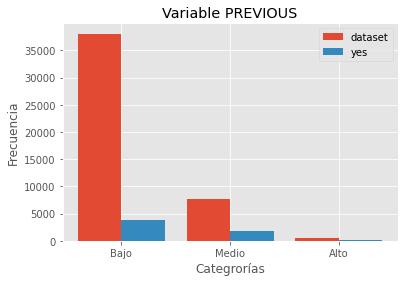

In [ ]:
x = np.array(["Bajo", "Medio", "Alto"])

label = "previous"
b1 = len(df_bank[(df_bank[label] >= 0) & (df_bank[label] <= 1)])
b2 = len(df_bank[(df_bank[label] >= 1) & (df_bank[label] <= 10)])
b3 = len(df_bank[(df_bank[label] >= 9) & (df_bank[label] <= 58)])

b4 = len(df_bank_yes[(df_bank_yes[label] >= 0) & (df_bank_yes[label] <= 1)])
b5 = len(df_bank_yes[(df_bank_yes[label] >= 1) & (df_bank_yes[label] <= 10)])
b6 = len(df_bank_yes[(df_bank_yes[label] >= 9) & (df_bank_yes[label] <= 58)])

y1 = np.array([b1, b2, b3])
y2 = np.array([b4, b5, b6])

X = np.arange(len(x))


plt.bar(X-0.2, y1, 0.4, label = 'dataset')
plt.bar(X+0.2, y2, 0.4, label = 'yes')

plt.legend()
plt.xticks(X, x)

plt.xlabel("Categrorías")
plt.ylabel("Frecuencia")
plt.title("Variable PREVIOUS")
plt.show()

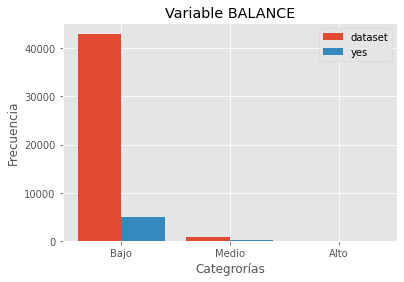

In [ ]:
x = np.array(["Bajo", "Medio", "Alto"])

label = "balance"
b1 = len(df_bank[df_bank[label] <= 15000])
b2 = len(df_bank[(df_bank[label] >= 10000) & (df_bank[label] <= 60000)])
b3 = len(df_bank[(df_bank[label] >= 50000) & (df_bank[label] <= 140000)])

b4 = len(df_bank_yes[df_bank_yes[label] <= 15000])
b5 = len(df_bank_yes[(df_bank_yes[label] >= 10000) & (df_bank_yes[label] <= 60000)])
b6 = len(df_bank_yes[(df_bank_yes[label] >= 50000) & (df_bank_yes[label] <= 140000)])


y1 = np.array([b1, b2, b3])
y2 = np.array([b4, b5, b6])

X = np.arange(len(x))


plt.bar(X-0.2, y1, 0.4, label = 'dataset')
plt.bar(X+0.2, y2, 0.4, label = 'yes')

plt.legend()
plt.xticks(X, x)

plt.xlabel("Categrorías")
plt.ylabel("Frecuencia")
plt.title("Variable BALANCE")
plt.show()

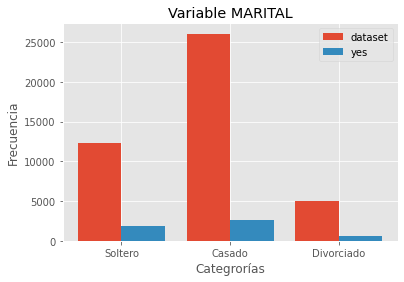

In [ ]:
x = np.array(["Soltero", "Casado", "Divorciado"])

label = "marital"
b1 = len(df_bank[df_bank[label] == "single"])
b2 = len(df_bank[df_bank[label] == "married"])
b3 = len(df_bank[df_bank[label] == "divorced"])

b4 = len(df_bank_yes[df_bank_yes[label] == "single"])
b5 = len(df_bank_yes[df_bank_yes[label] == "married"])
b6 = len(df_bank_yes[df_bank_yes[label] == "divorced"])


y1 = np.array([b1, b2, b3])
y2 = np.array([b4, b5, b6])

X = np.arange(len(x))


plt.bar(X-0.2, y1, 0.4, label = 'dataset')
plt.bar(X+0.2, y2, 0.4, label = 'yes')

plt.legend()
plt.xticks(X, x)

plt.xlabel("Categrorías")
plt.ylabel("Frecuencia")
plt.title("Variable MARITAL")
plt.show()

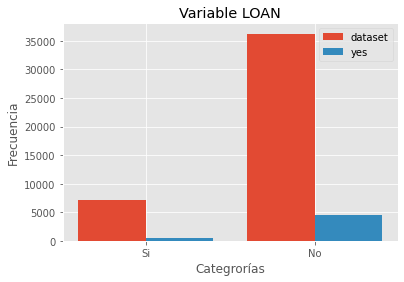

In [ ]:
x = np.array(["Si", "No"])

label = "loan"
b1 = len(df_bank[df_bank[label] == "yes"])
b2 = len(df_bank[df_bank[label] == "no"])

b3 = len(df_bank_yes[df_bank_yes[label] == "yes"])
b4 = len(df_bank_yes[df_bank_yes[label] == "no"])


y1 = np.array([b1, b2])
y2 = np.array([b3, b4])

X = np.arange(len(x))


plt.bar(X-0.2, y1, 0.4, label = 'dataset')
plt.bar(X+0.2, y2, 0.4, label = 'yes')

plt.legend()
plt.xticks(X, x)

plt.xlabel("Categrorías")
plt.ylabel("Frecuencia")
plt.title("Variable LOAN")
plt.show()

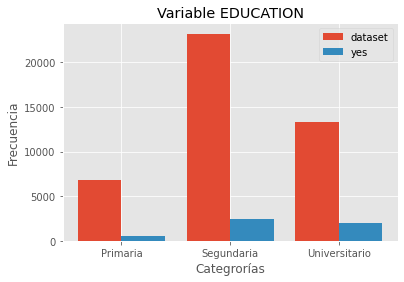

In [ ]:
x = np.array(["Primaria", "Segundaria", "Universitario"])

label = "education"
b1 = len(df_bank[df_bank[label] == "primary"])
b2 = len(df_bank[df_bank[label] == "secondary"])
b3 = len(df_bank[df_bank[label] == "tertiary"])


b4 = len(df_bank_yes[df_bank_yes[label] == "primary"])
b5 = len(df_bank_yes[df_bank_yes[label] == "secondary"])
b6 = len(df_bank_yes[df_bank_yes[label] == "tertiary"])



y1 = np.array([b1, b2, b3])
y2 = np.array([b4, b5, b6])

X = np.arange(len(x))


plt.bar(X-0.2, y1, 0.4, label = 'dataset')
plt.bar(X+0.2, y2, 0.4, label = 'yes')

plt.legend()
plt.xticks(X, x)

plt.xlabel("Categrorías")
plt.ylabel("Frecuencia")
plt.title("Variable EDUCATION")
plt.show()